# Homework 3. Numerical integration of equations of motions

This homework consists of 3 tasks, worth in total 14 points. 
Please,  add your answers to this notebook and submit it via  Whiteboard.

## Task 1. Euler's integration scheme

1) Use Newton's equation of motion, conduct a Taylor expansion of `x(t)` (up to second order) and derive Euler's integration scheme. **(1/2pt)**

2) Given the potential of the mathematical harmonic oscillator in 1D, $ U = \frac{1}{2} m \omega^2 x^2 $, *briefly* derive the analytical solution of the time course of position `x(t)` and velocity `v(t)`. **(1/1pt)**

3) Choose  $ \omega = 1 $ and plot the time course of `x(t)` and the phase space trajectory `(x(t), v(t))` given some initial conditions. **(1/1pt)**

4) Use the integrator that you derived above to numerically integrate the harmonic oscillator equation of motion. Do so by choosing the same starting configuration as in your analytical solution. Which integrator step do you have to use in order to make the integration work when judging from a visual comparison of the trajectories? Note that a too small integration step will produce constant output while a too large integration step might produce infinity or `NaN.` **(2.5/3pt)** 

5) Assess how well the total energy is conserved during the trajectory time that you are plotting. **(1/1pt)**


<div style="background-color: #cfc ; padding: 10px; border: 1px solid green; color:black;"> 
For question 1 the equation for v is missing from your derivation and in the Euler integration scheme the terms for x stop at first order to be consistent with the terms for v, which is what you implemented later.
</div>

In [130]:
# Write your solution here. You can use as many cells as you wish

import numpy as np
import matplotlib.pyplot as plt

#Task 1. Newton's equation of motion and 2 are derived analytically and attached 
def Newton(m, x):
    """F is the force acting on the object 
        m is the mass of the object
        a is the accelertaion of the object"""
    F = m*a
    return F



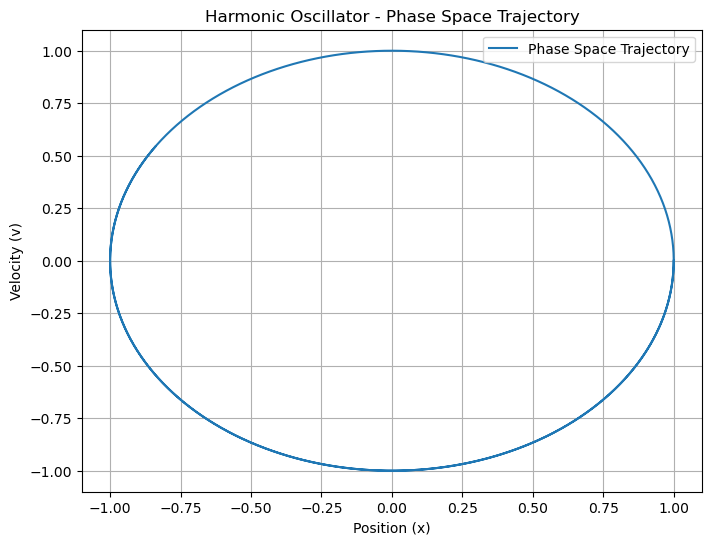

In [131]:
#Task 3
#harmonic oscillator from worksheet 
def harmonic_oscillator_force(x,omega=1):
    force = -omega*omega*x
    return force

#solution for x(t) and v(t) derived analytically in the attachment Task 2
def harmonic_oscillator_position_velocity(t, A=1, omega=1, phi=0):
    position = A * np.cos(omega * t + phi)
    velocity = -A * omega * np.sin(omega * t + phi)
    return position, velocity


#time values
t = np.linspace(0, 10, 1000)

#Initial conditions
A = 1.0  #Amplitude
omega = 1.0  #Angular frequency
phi = 0.0  #Phase constant

position, velocity = harmonic_oscillator_position_velocity(t, A, omega, phi)

#Plot the phase space trajectory
plt.figure(figsize=(8, 6))
plt.plot(position, velocity, label='Phase Space Trajectory')
plt.title('Harmonic Oscillator - Phase Space Trajectory')
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.legend()
plt.grid(True)
plt.show()

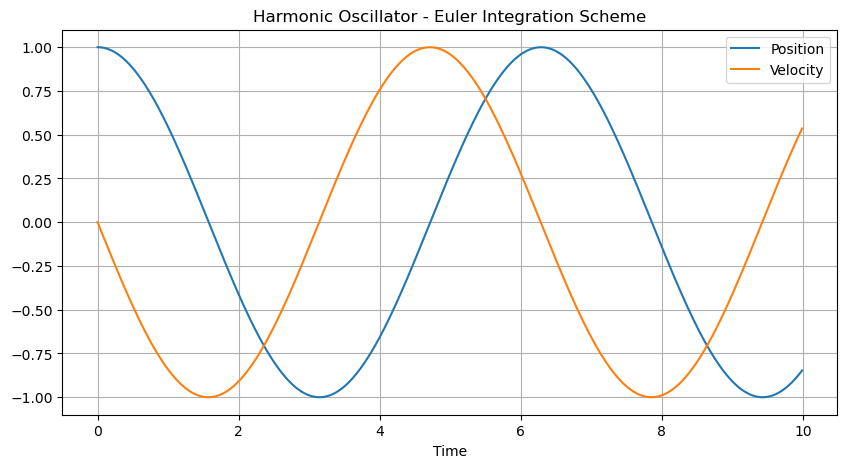

In [132]:
#Task 4 Numerically integrate with Euler Method
#Euler method updates the position and velocity after every timestep

#timestep for Euler integration, tried out a few values but h = 0.01 fits best
h = 0.01
n_steps = 1000

def harmonic_euler(h, A, omega, phi, n_steps):
    # Initial conditions
    x = A * np.cos(phi)
    v = -A * omega * np.sin(phi)

    #Lists to store position and velocity values
    positions = [x]
    velocities = [v]

   #Euler integration loop
    for i in range(1, n_steps):
        # Update position and velocity after every timestep
        x = x + h * v
        v = v - h * omega**2 * x

        positions.append(x)
        velocities.append(v)

    return np.array(positions), np.array(velocities)



positions, velocities = harmonic_euler(h, A, omega, phi, n_steps)

#Plot the results
time = np.arange(0, n_steps * h, h)
plt.figure(figsize=(10, 5))
plt.plot(time, positions, label='Position')
plt.plot(time, velocities, label='Velocity')
plt.title('Harmonic Oscillator - Euler Integration Scheme')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.show()




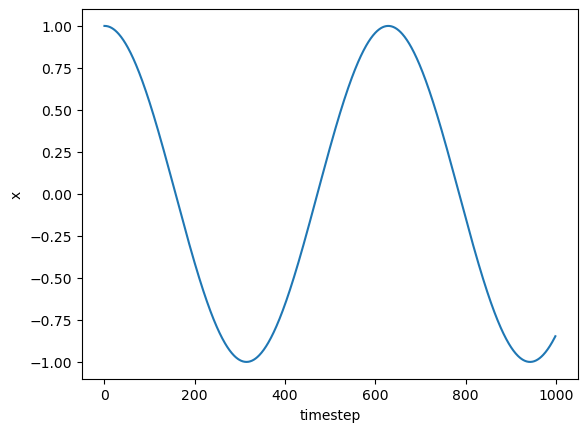

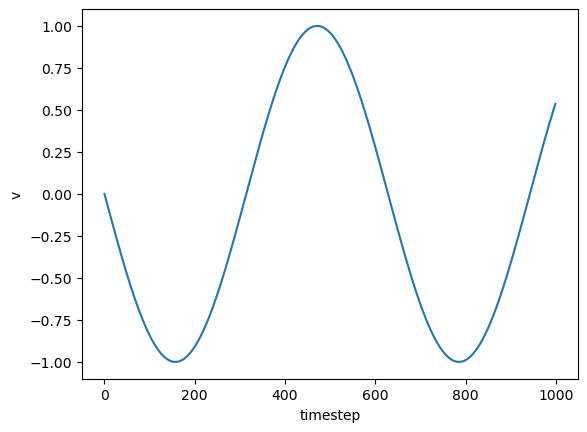

In [133]:
plt.plot(positions)
plt.xlabel('timestep')
plt.ylabel('x')
plt.show()

plt.plot(velocities)
plt.xlabel('timestep')
plt.ylabel('v')
plt.show()

Text(0, 0.5, 'Energy')

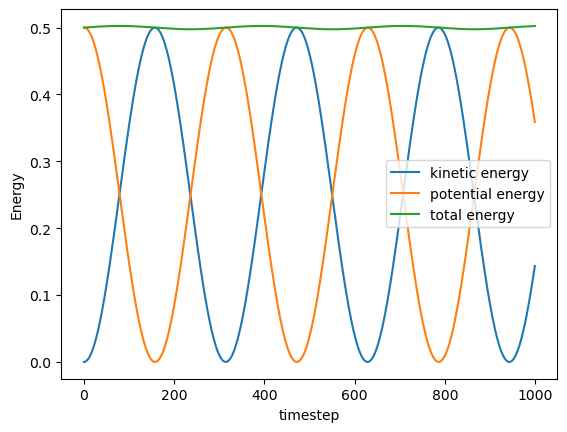

In [134]:
#Task 5 
#to check if the total energy of the system is conserved the potential and kinetic energy need to be summed
#same method as worksheet
#mass is set to 1 everywhere 
e_pot = 0.5*np.square(positions)*omega**2
e_kin = 0.5*np.square(velocities)
plt.plot(e_kin, label='kinetic energy')
plt.plot(e_pot, label='potential energy')
plt.plot(e_kin+e_pot, label='total energy')
plt.legend()
plt.xlabel('timestep')
plt.ylabel("Energy")

#The energy should not be conserved with the euler integration scheme, somehow it seems like the energy is conserved 
#in this plot  

<div style="background-color: #cfc ; padding: 10px; border: 1px solid green; color:black;"> 
Well done, we discussed the detail that was wrong in class. you should have set h = t[1]-t[0].
</div>


## Task 2. Velocity Verlet integration scheme

1) Implement a velocity Verlet integrator and check that it works for the harmonic oscillator, e.g. by showing that it reproduces the analytical solution for a small enough integrator step size. **(3/3pt)**

2) For different integration step sizes, analyze the energy conservation as done above. What do you observe? **(1/1pt)**



In [135]:
# Write your solution here. You can use as many cells as you wish
#using the script from the exercise to derive the verlet integrator
#main difference between verlet and velocity verlet is that the verlet
#integrator uses two steps and velocity verlet combines them into one and 
#is therfore more accurate
 
# In the discussion below, consider m = 1
nsteps = 10000
omega = 1
x0 = 1
v0 = 1
dt = 0.001

def harmonic_oscillator_force(x,omega=1):
    force = -omega*omega*x
    return force


def velocity_verlet_integration(x0, v0, dt, nsteps, force, **kwargs):
    """
    Velocity Verlet integration
    """
    #1.update velocity halfway
    #2.update position using the intermediate velocity 
    #3.update velocity based on the updated position
    coordinates_verlet = np.zeros(nsteps)
    velocities_verlet = np.zeros(nsteps)

    # Initialization 
    v_current = v0
    x_current = x0
    

    for step_ndx in range(nsteps):
        v_halfway = v_current + ((force(x_current, **kwargs))/2)*dt #1. velocity update
        x_update = x_current + v_halfway*dt #2. update position using intermediate velocity
        v_update = v_halfway + ((force(x_update, **kwargs))/2)*dt #3.update velocity based on the updated position
        velocities_verlet[step_ndx] = v_current
        coordinates_verlet[step_ndx] = x_current
        x_current = x_update
        v_current = v_update
    return coordinates_verlet, velocities_verlet


coordinates_verlet, velocities_verlet = velocity_verlet_integration(x0, v0, dt, nsteps, harmonic_oscillator_force)

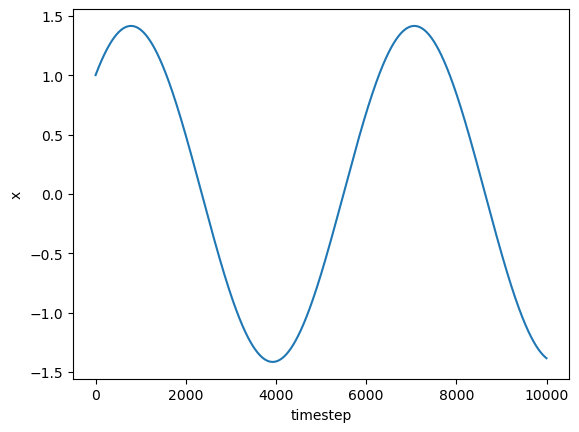

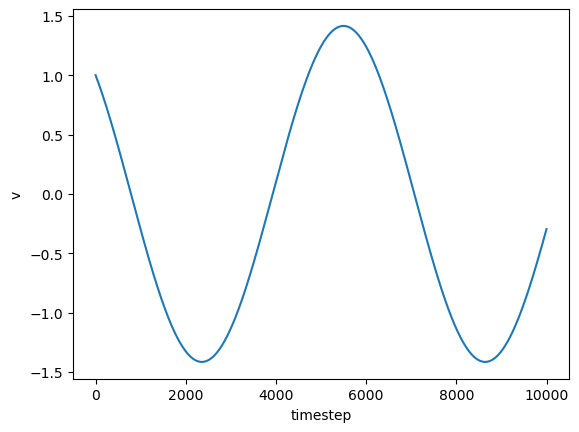

In [136]:
plt.plot(coordinates_verlet)
plt.xlabel('timestep')
plt.ylabel('x')
plt.show()

plt.plot(velocities_verlet)
plt.xlabel('timestep')
plt.ylabel('v')
plt.show()

Text(0, 0.5, 'Energy')

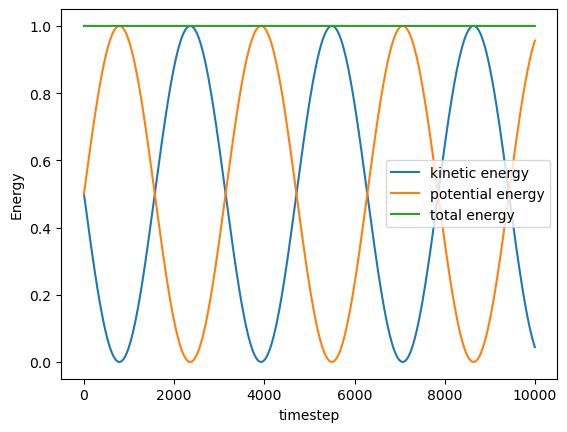

In [137]:
#Task 5 
#to check if the total energy of the system is conserved the potential and kinetic energy need to be summed
#same method as worksheet
#mass is set to 1 everywhere 
e_pot = 0.5*np.square(coordinates_verlet)*omega**2
e_kin = 0.5*np.square(velocities_verlet)
plt.plot(e_kin, label='kinetic energy')
plt.plot(e_pot, label='potential energy')
plt.plot(e_kin+e_pot, label='total energy')
plt.legend()
plt.xlabel('timestep')
plt.ylabel("Energy")


In [138]:
#2. For different step sizes analyze energy integration 
#The energy is conserved but the step size needs to be small enough otherwise the graph is not sinosidal anymore 
#an accurate step size would be 0.001 

<div style="background-color: #cfc ; padding: 10px; border: 1px solid green; color:black;"> 
Well done! Indeed, a too large timestep breaks even the best integrator.
</div>

## Task 3  Choice of an integrator for MD

1) Describe in your own words:

If our integrators were integrating realizations of a thermodynamic system, what thermodynamic ensemble would it describe? In order to describe a real physical system, what variables would we need to control? What other basic principle does the implemented dynamics obey with respect to time, and how is it related to thermodynamics? **(1.5/2pt)**

In [139]:
# Write your solution here. You can use as many cells as you wish
#In the Thermodynamic system must be a conservation of energy which would be the case in the microcanonical ensemble

#Real physical system: In a real physical system way more variables would be considered, for the harmonic oscillator 
#(which is already an approximated model) variables like damping, because we approximate that the oscillator is not 
#weakening with time, more general variables like pressure and temperature need to be considered 

#The implemented dynamics obey the preservation of volume, because the integrators are symplectic
#the energy is conserved
# 

<div style="background-color: #cfc ; padding: 10px; border: 1px solid green; color:black;"> 
Yes, pressure and temperature are controlled in experiments, which is why it would be good to have a way of conducting simulations in other ensembles than the microcanonical one.
</div>

<div class="alert alert-block alert-info"> <b>GRADE</b> 12/14 </div>